In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern

In [2]:
def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

In [3]:
x = np.arange(-5, 5, 0.1)
m = np.zeros(len(x))

In [4]:
def kernel(x1, x2):
    tmp = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            tmp[i,j] = np.exp(-0.5 * np.abs(x1[i] - x2[j])**2)        
    return tmp

In [5]:
a = np.random.multivariate_normal(m, kernel(x, x), 3)

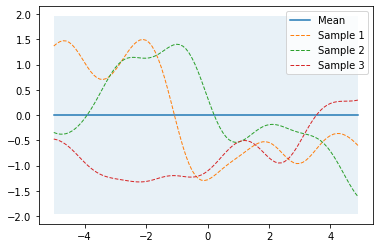

In [6]:
plot_gp(m,kernel(x, x),x,samples=a)

In [13]:
conditional_x_values = np.array([-4, -3, -2, -1, 1, 2, 4]).reshape(-1, 1)
conditional_y_values = np.cos(conditional_x_values).reshape(-1, 1)

In [8]:
from numpy.linalg import inv
def posterior_distribution(xs, conditional_x_values, conditional_y_values):
    kyi = inv(kernel(conditional_x_values, conditional_x_values))
    kst = kernel(conditional_x_values, xs).T
    kss = kernel(xs, xs)
    mu = kst.dot(kyi).dot(conditional_y_values)
    co = kss - kst.dot(kyi).dot(kst.T)
    return mu,co

In [14]:
mu, co = posterior_distribution(x, conditional_x_values, conditional_y_values)

In [19]:
from skopt.space import Integer
Integer(1, 2, name='p')

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Integer(low=1, high=2)

In [22]:
from skopt.space import Real
d = Real(1,2,name='d',prior='log-uniform')

In [33]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

boston = load_boston()
x, y = boston.data, boston.target
n_features = X.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = GradientBoostingRegressor(n_estimators=50, random_state=0)

In [35]:
from skopt.utils import use_named_args
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, 3, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    print(space)
    
objective()

TypeError: wrapper() missing 1 required positional argument: 'x'

In [86]:
def f(x):
    return -x[0]*x[0] + 1;

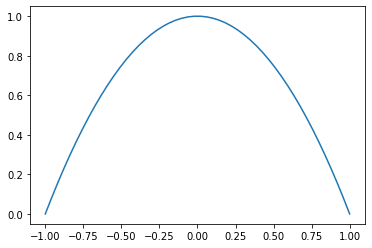

In [87]:
x = np.linspace(-1,1)
plt.plot(x, -x**2 + 1)

In [88]:
space = [Real(-1,1)]

In [77]:
from skopt import gp_minimize
a = gp_minimize(f, space, n_calls=30)

In [80]:
a.fun

1.0000000937756819

1. Function that returns validation MSE given set of hyperparameters 

In [15]:
a = np.random.multivariate_normal(mu.ravel(), co, 3)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


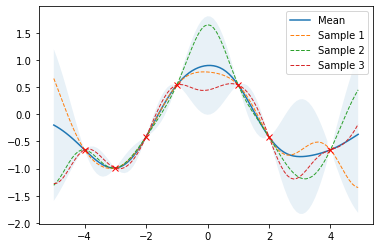

In [16]:
plot_gp(mu, co, x, conditional_x_values, conditional_y_values, samples=a)